In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import kurtosis
from scipy.stats import skew


In [2]:
def check_normalteste(series):
    #calculate
    stat, p = normaltest(series)
    print (f'Statistic={stat}, p={p}')
    print ('--'*25) 

    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [3]:
#Calculating Skew and Kurtosis 
def skew_kurtosis(series):
    k = round((kurtosis(series)), ndigits=3)
    s = round((skew(series)), ndigits=3)

    #Interpreting Skew 
    if -0.5 < s < 0.5:
        print (f'\nA skew of {s} means the distribution is approx. symmetric')
    elif  -0.5 < s < -1.0 or 0.5 < s < 1.0:
        print (f'\nA skew of {s} means the distribution is moderately skewed')
    else:
        print (f'\nA skew of {s} means the distribution is highly skewed')

    #Interpreting Kurtosis
    if  -0.5 < k < 0.5:
        print (f'A kurtosis of {k} means the distribution is approximately normal sometimes called mesokurtic distributions')
    elif k <= -0.5: 
        print (f'A kurtosis of {k} means the distribution is light-tailed (negative) sometimes called a platykurtic        distributions')
    elif k >= 0.5:
        print (f'A kurtosis of {k} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')

In [4]:
df = pd.read_csv('timeserie_train.csv', parse_dates=['data'], index_col='data')

In [5]:
energia = df['energia']

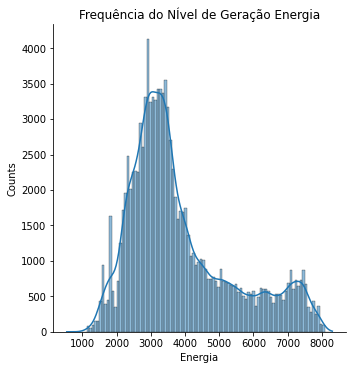

Statistic=12756.828694908052, p=0.0
--------------------------------------------------
Sample does not look Gaussian (reject H0)

A skew of 0.979 means the distribution is moderately skewed
A kurtosis of 0.105 means the distribution is approximately normal sometimes called mesokurtic distributions


In [6]:
#Plot a Histogram of the data
ax = sns.displot(energia, kde=True)
ax.set(xlabel= 'Energia', ylabel='Counts', title='Frequência do NÍvel de Geração Energia')
plt.show()

check_normalteste(energia)
skew_kurtosis(energia)

Statistic=1996.7336911184357, p=0.0
--------------------------------------------------
Sample does not look Gaussian (reject H0)

A skew of 0.231 means the distribution is approx. symmetric
A kurtosis of -0.38 means the distribution is approximately normal sometimes called mesokurtic distributions


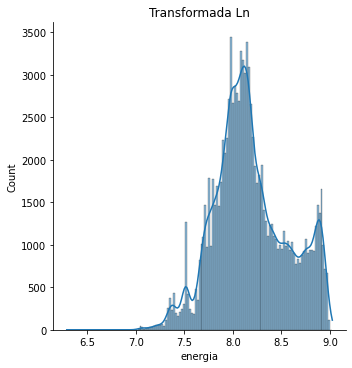

In [7]:
ts_temp_log = np.log(energia)
sns.displot(ts_temp_log, kde=True).set(title="Transformada Ln")
check_normalteste(ts_temp_log)
skew_kurtosis(ts_temp_log)

Lambda: -0.2392553335268493
Statistic=371.01800822100887, p=2.719337874041855e-81
--------------------------------------------------
Sample does not look Gaussian (reject H0)

A skew of 0.009 means the distribution is approx. symmetric
A kurtosis of -0.247 means the distribution is approximately normal sometimes called mesokurtic distributions


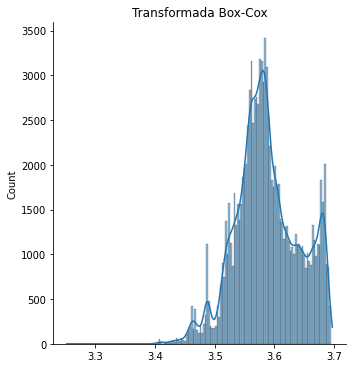

In [8]:
fitted_data, fitted_lambda = stats.boxcox(energia) 
sns.displot(fitted_data, kde=True).set(title="Transformada Box-Cox")
print(f"Lambda: {fitted_lambda}")
check_normalteste(fitted_data)
skew_kurtosis(fitted_data)

In [9]:
#z-score normalization 
energia_zscore = stats.zscore(energia)

#calculate transformation 
energia_lbmd1  = stats.yeojohnson(energia_zscore, lmbda=0.1)
energia_lbmd2  = stats.yeojohnson(energia_zscore, lmbda=1.5)

#if you do not pass a lambda it will find the optimal lambda 
energia_lbmd3, lmbda  = stats.yeojohnson(energia_zscore)

print (f'The Optimal Lambda is {lmbda}')

The Optimal Lambda is 0.2136826881068006


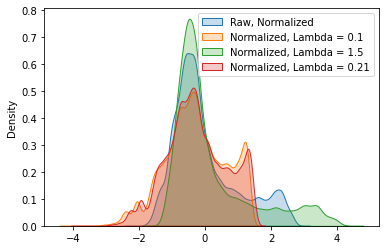

In [10]:
sns.kdeplot(energia_zscore,shade=True, label='Raw, Normalized')
sns.kdeplot(energia_lbmd1, shade=True, label='Normalized, Lambda = 0.1')
sns.kdeplot(energia_lbmd2, shade=True, label='Normalized, Lambda = 1.5')
sns.kdeplot(energia_lbmd3, shade=True, label='Normalized, Lambda = 0.21')
plt.legend(loc='upper right')

In [11]:
check_normalteste(energia_lbmd3)
skew_kurtosis(energia_lbmd3)

Statistic=2673.3335215301718, p=0.0
--------------------------------------------------
Sample does not look Gaussian (reject H0)

A skew of 0.035 means the distribution is approx. symmetric
A kurtosis of -0.541 means the distribution is light-tailed (negative) sometimes called a platykurtic        distributions


<AxesSubplot:xlabel='energia', ylabel='Density'>

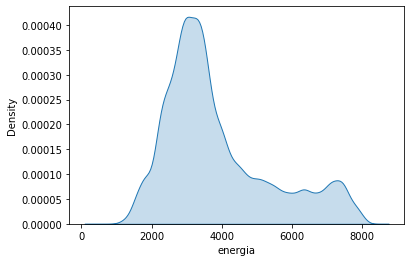

In [12]:
sns.kdeplot(energia, shade=True)


<AxesSubplot:ylabel='Density'>

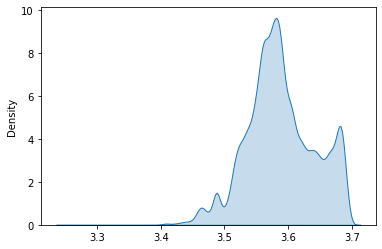

In [13]:

sns.kdeplot(fitted_data, shade=True)


In [ ]:
fitted_data

In [14]:
def get_bins(serie):
    q25, q75 = np.percentile(serie,[.25,.75])
    bin_width = 2*(q75 - q25)*len(serie)**(-1/3)
    return round((serie.max() - serie.min())/bin_width)

In [15]:
csv_path = 'timeserie_train.csv'
data =  pd.read_csv(csv_path,dtype = {'Data':str,'Consumo':np.float64})
bins = get_bins(energia)

<AxesSubplot:xlabel='energia', ylabel='Density'>

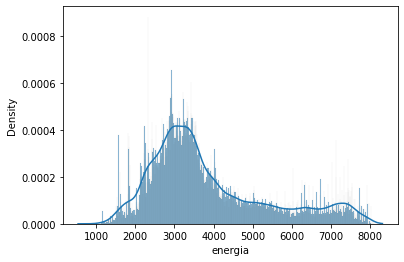

In [16]:
sns.histplot(energia,stat='density',bins = get_bins(energia),kde =True)

In [17]:
serie = np.asarray(df['energia'].values)

In [18]:
b_c= stats.boxcox(serie)

In [19]:
new_series = pd.DataFrame(b_c[0],columns=['Consumo'])

<AxesSubplot:ylabel='Density'>

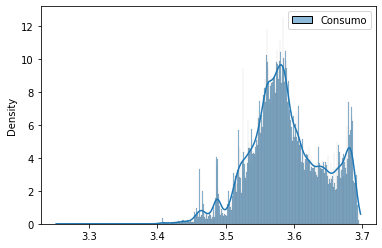

In [20]:
sns.histplot(new_series,stat='density',bins = get_bins(new_series['Consumo']),kde =True)